In [172]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

# 그래디언트 부스팅_연습

In [4]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
df_raw["JOB"].fillna("OTHER", inplace=True)

In [6]:
df_raw.fillna(df_raw.mean(), inplace=True)

In [7]:
df_raw_dummy= pd.get_dummies(df_raw)

In [8]:
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_OTHER,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,0,1,0,0,0,0


In [9]:
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False)

In [10]:
df_raw_y=df_raw_dummy["BAD"]

In [11]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=1234)

In [12]:

print("분할 전 설명변수 데이터:", df_raw_x.shape)
print("분할 후 설명변수 데이터: Train", df_train_x.shape, " Test", df_test_x.shape)

분할 전 설명변수 데이터: (3748, 19)
분할 후 설명변수 데이터: Train (2623, 19)  Test (1125, 19)


In [46]:
from imblearn.over_sampling import SMOTE

print(df_raw.value_counts(["diagnosis"]),"\n")
print("diagnosis=1 비율", df_raw.value_counts(df_raw["diagnosis"]==1)/len(df_raw))

plt.figure(figsize=(10,8))
df_raw['color']=np.where(df_raw["diagnosis"]==1, "red","blue")



diagnosis
음성           212
양성           108
dtype: int64 

diagnosis=1 비율 diagnosis
False    1.0
dtype: float64


<Figure size 1000x800 with 0 Axes>

In [47]:
sm=SMOTE(sampling_strategy='auto')

x_resampled, y_resampled =sm.fit_resample(df_train_x, df_train_y)

print('Over-Sampling 전:\n', df_train_y.value_counts(),"\n")
print('Over-Sampling 후 Train X:{}'.format(x_resampled.shape))
print('Over-Sampling 후 Train Y:{}\n'.format(y_resampled.shape))
print("Over-Sampling 후 '1':{}".format(sum(y_resampled==1)))
print("Over-Sampling 후 '0':{}".format(sum(y_resampled==0)))


Over-Sampling 전:
 음성    132
양성     60
Name: diagnosis, dtype: int64 

Over-Sampling 후 Train X:(264, 30)
Over-Sampling 후 Train Y:(264,)

Over-Sampling 후 '1':0
Over-Sampling 후 '0':0


In [48]:
y_resampled.value_counts()

음성    132
양성    132
Name: diagnosis, dtype: int64

In [49]:
gb_uncust=GradientBoostingClassifier(random_state=6659)
gb_uncust.fit(x_resampled, y_resampled)

print("Accuracy on training set: {:.3f}".format(gb_uncust.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(gb_uncust.score(df_test_x,df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.930


In [50]:
print(gb_uncust.get_params().keys())
print(gb_uncust.get_params().values())

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
dict_values([True, 0.0, None, 'gini', None, 'sqrt', None, None, 0.0, 1, 2, 0.0, 100, None, False, 6659, 0, False])


In [ ]:
train_accuracy=[]; test_accuracy=[]
para_lr =[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr :
    gb= GradientBoostingClassifier(learning_rate=v_learning_rate, random_state=6659)
    gb.fit(x_resampled, y_resampled)
    train_accuracy.append(gb.score(x_resampled, y_resampled))
    test_accuracy.append(gb.score(df_test_x,df_test_y))

In [ ]:
df_accuracy_lr= pd.DataFrame()
df_accuracy_lr["n_estiators"]=para_lr
df_accuracy_lr["TrainScore"]= train_accuracy
df_accuracy_lr["TestScore"]=test_accuracy
df_accuracy_lr.round(3)

In [ ]:
plt.plot(para_lr, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_lr, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [51]:
train_accuracy=[]; test_accuracy=[]
para_n_tree =[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    gb= GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate=0.1,random_state=6659)
    gb.fit(x_resampled, y_resampled)
    train_accuracy.append(gb.score(x_resampled, y_resampled))
    test_accuracy.append(gb.score(df_test_x,df_test_y))

In [52]:
df_accuracy_n= pd.DataFrame()
df_accuracy_n["n_estiators"]=para_n_tree
df_accuracy_n["TrainScore"]= train_accuracy
df_accuracy_n["TestScore"]=test_accuracy
df_accuracy_n.round(3)

,n_estiators,TrainScore,TestScore
0,3,0.989,0.914
1,6,1.000,0.914
2,9,1.000,0.906
3,12,1.000,0.898
4,15,1.000,0.914
5,18,1.000,0.914
6,21,1.000,0.914
7,24,1.000,0.930
8,27,1.000,0.938
9,30,1.000,0.930


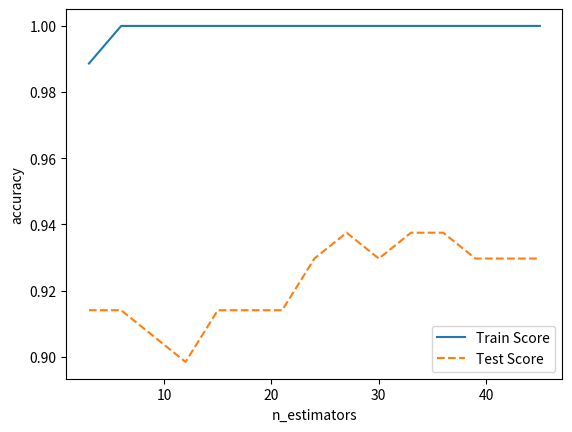

In [53]:
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [54]:
train_accuracy=[]; test_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth :
    gb= GradientBoostingClassifier(max_depth=v_max_depth, learning_rate=0.1,n_estimators=100,random_state=6659)
    gb.fit(x_resampled, y_resampled)
    train_accuracy.append(gb.score(x_resampled, y_resampled))
    test_accuracy.append(gb.score(df_test_x,df_test_y))

In [55]:
df_accuracy_depth= pd.DataFrame()
df_accuracy_depth["Depth"]=para_depth
df_accuracy_depth["TrainScore"]= train_accuracy
df_accuracy_depth["TestScore"]=test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainScore,TestScore
0,3,0.989,0.930
1,4,0.992,0.930
2,5,0.992,0.922
3,6,1.000,0.922
4,7,1.000,0.938
5,8,1.000,0.938
6,9,1.000,0.938
7,10,1.000,0.938


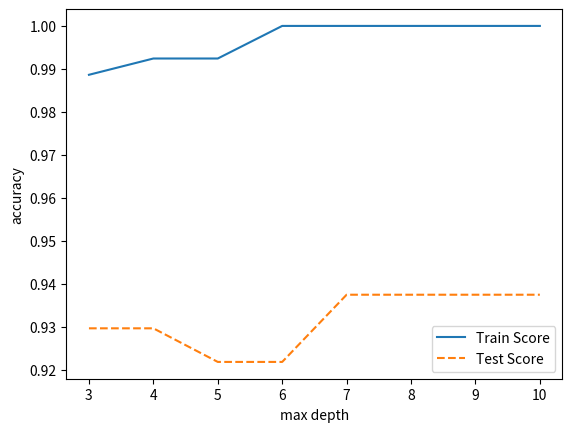

In [56]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_depth, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

In [57]:
train_accuracy=[]; test_accuracy=[]
para_split=[n_split*10 for n_split in range(2,11)]

for v_min_samples_split in para_split :
    gb= GradientBoostingClassifier(min_samples_split=v_min_samples_split,max_depth=6, learning_rate=0.1,n_estimators=40,random_state=6659)
    gb.fit(x_resampled, y_resampled)
    train_accuracy.append(gb.score(x_resampled, y_resampled))
    test_accuracy.append(gb.score(df_test_x,df_test_y))

In [58]:
df_accuracy_split= pd.DataFrame()
df_accuracy_split["MinSampleSplit"]=para_split
df_accuracy_split["TrainScore"]= train_accuracy
df_accuracy_split["TestScore"]=test_accuracy
df_accuracy_split.round(3)

,MinSampleSplit,TrainScore,TestScore
0,2,0.992,0.922
1,4,0.992,0.922
2,6,0.992,0.922
3,8,0.992,0.922
4,10,0.992,0.922
5,12,0.992,0.914
6,14,0.992,0.914
7,16,0.985,0.914
8,18,0.985,0.914
9,20,0.981,0.914


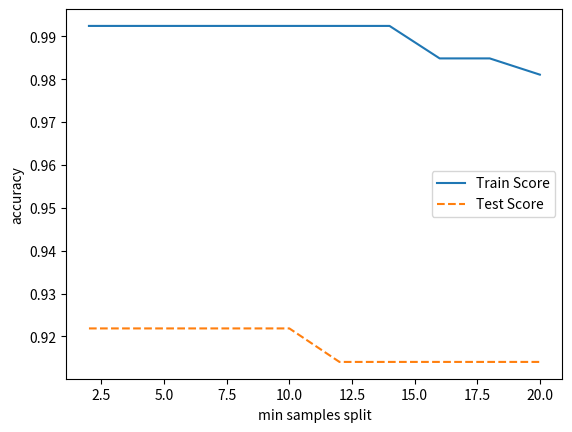

In [59]:
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_split, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [60]:
train_accuracy=[]; test_accuracy=[]
para_leaf=[n_leaf*5 for n_leaf in range(3,11)]

for v_min_samples_leaf in para_leaf :
    gb= GradientBoostingClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=6, learning_rate=0.1,n_estimators=100,random_state=6659)
    gb.fit(x_resampled, y_resampled)
    train_accuracy.append(gb.score(x_resampled, y_resampled))
    test_accuracy.append(gb.score(df_test_x,df_test_y))

In [61]:
df_accuracy_leaf= pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"]=para_leaf
df_accuracy_leaf["TrainScore"]= train_accuracy
df_accuracy_leaf["TestScore"]=test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,3,0.985,0.914
1,4,0.981,0.922
2,5,0.981,0.914
3,6,0.981,0.922
4,7,0.977,0.922
5,8,0.973,0.914
6,9,0.973,0.922
7,10,0.970,0.922


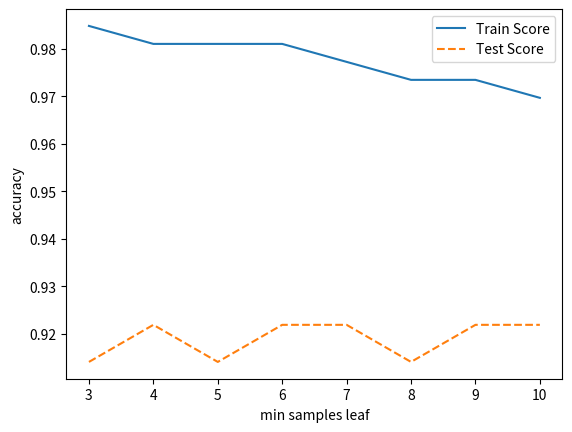

In [62]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("min samples leaf"); plt.ylabel("accuracy")
plt.legend()

## min_samples_leaf의 최적값 찾기 위해 for문 통해 돌리고 시각화 하여 보았습니다. 너무 높은 값은 과적합 위험이 있고 split보다 작은 값을 부여해야 하기에 4를 선정해주었습니다.

In [71]:
gb_final= GradientBoostingClassifier(min_samples_leaf=15,max_depth=6, learning_rate=0.1,n_estimators=100,random_state=6659)
gb_final.fit(x_resampled, y_resampled)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=40, random_state=6659)

In [72]:
y_pred=gb_final.predict(df_test_x)

In [73]:
print("Accuracy on training set: {:.3f}".format(gb_final.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.981
Accuracy on test set: 0.922
Confusion Matrix:
[[38 10]
 [ 0 80]]
              precision    recall  f1-score   support

          양성      1.000     0.792     0.884        48
          음성      0.889     1.000     0.941        80

    accuracy                          0.922       128
   macro avg      0.944     0.896     0.912       128
weighted avg      0.931     0.922     0.920       128



In [74]:
v_feature_name= x_resampled.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= rf_final.feature_importances_

In [75]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
23,worst_area,0.158
20,worst_radius,0.129
27,worst_concave_points,0.100
26,worst_concavity,0.082
22,worst_perimeter,0.074
7,mean_concave_points,0.070
0,mean_radius,0.069
13,area_error,0.054
3,mean_area,0.045
6,mean_concavity,0.043


Text(0, 0.5, '설명변수')

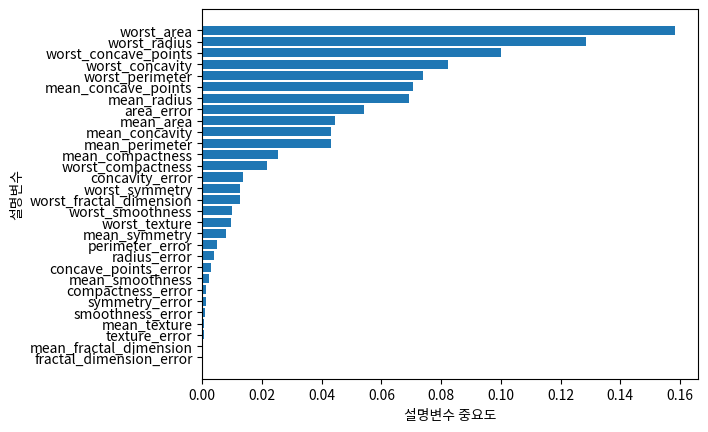

In [76]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

In [78]:
estimator= GradientBoostingClassifier(n_estimators=100,random_state=6659)
param_grid={"learning_rate":para_lr,"max_depth":para_depth, "min_samples_leaf":para_leaf}

grid_gb=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_gb.fit(x_resampled, y_resampled)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter:\n{}".format(grid_gb.best_params_))
print("\nbest score:\n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=40,
                       random_state=6659)

best parameter:
{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 2}

best score:
0.966


In [ ]:
## n_estimators만 40으로 남기고 GridSearch를 통하여 최적 파라미터를 찾아보았습니다.

In [79]:
gb_final= GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=10,max_depth=3,random_state=6659)
gb_final.fit(x_resampled, y_resampled)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=40,
                       random_state=6659)

In [80]:
y_pred=gb_final.predict(df_test_x)

In [81]:

print("Accuracy on training set: {:.3f}".format(gb_final.score(x_resampled, y_resampled)))
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.958
Accuracy on test set: 0.914
Confusion Matrix:
[[37 11]
 [ 0 80]]
              precision    recall  f1-score   support

          양성      1.000     0.771     0.871        48
          음성      0.879     1.000     0.936        80

    accuracy                          0.914       128
   macro avg      0.940     0.885     0.903       128
weighted avg      0.924     0.914     0.911       128



In [82]:
v_feature_name= x_resampled.columns
df_importance=pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["importance"]= gb_final.feature_importances_

In [83]:
df_importance.sort_values("importance",ascending=False, inplace= True)
df_importance.round(3)

,Feature,importance
23,worst_area,0.143
20,worst_radius,0.128
27,worst_concave_points,0.107
26,worst_concavity,0.093
22,worst_perimeter,0.079
13,area_error,0.074
7,mean_concave_points,0.074
2,mean_perimeter,0.065
3,mean_area,0.041
0,mean_radius,0.040


Text(0, 0.5, '설명변수')

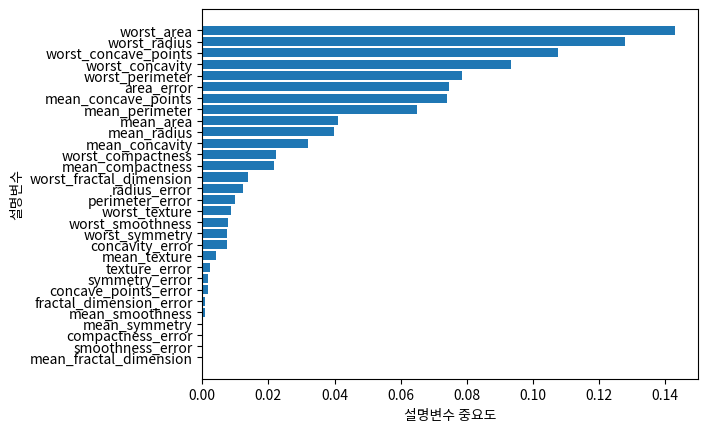

In [84]:
df_importance.sort_values("importance",ascending=True, inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates, width= df_importance["importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# XGBoost

In [58]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [59]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)

xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [60]:
# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[2382    0]
 [   0  241]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[1021    0]
 [  58   46]] 

정확도: 0.9484
정밀도: 1.0000
재현율: 0.4423
F1    : 0.6133
AUC   : 0.7212


In [61]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state=1234)
# 모델 적합
xgboost_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n',classification_report(df_train_y, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n',classification_report(df_test_y, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[2382    0]
 [  48  193]] 

정확도: 0.9817
정밀도: 1.0000
재현율: 0.8008
F1    : 0.8894
AUC   : 0.9004

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2382
           1       1.00      0.80      0.89       241

    accuracy                           0.98      2623
   macro avg       0.99      0.90      0.94      2623
weighted avg       0.98      0.98      0.98      2623


 사용자 모델 평가 : Test 

오차행렬:
 [[1020    1]
 [  65   39]] 

정확도: 0.9413
정밀도: 0.9750
재현율: 0.3750
F1    : 0.5417
AUC   : 0.6870

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.97      0.38      0.54       104

    accuracy                           0.94      1125
   macro avg       0.96      0.69      0.76      1125
weighted avg       0.94      0.94      0.93      1125



In [62]:
# sklearn XGBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

xgb_stop = XGBClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150, 
                eval_metric="logloss", eval_set = eval_df, verbose=True)

[0]	validation_0-logloss:0.62092
[1]	validation_0-logloss:0.56184
[2]	validation_0-logloss:0.51341
[3]	validation_0-logloss:0.47230
[4]	validation_0-logloss:0.43716
[5]	validation_0-logloss:0.40648
[6]	validation_0-logloss:0.38075
[7]	validation_0-logloss:0.35740
[8]	validation_0-logloss:0.33736
[9]	validation_0-logloss:0.32025
[10]	validation_0-logloss:0.30528
[11]	validation_0-logloss:0.29236
[12]	validation_0-logloss:0.28106
[13]	validation_0-logloss:0.27113
[14]	validation_0-logloss:0.26233
[15]	validation_0-logloss:0.25407
[16]	validation_0-logloss:0.24520
[17]	validation_0-logloss:0.23947
[18]	validation_0-logloss:0.23388
[19]	validation_0-logloss:0.22930
[20]	validation_0-logloss:0.22485
[21]	validation_0-logloss:0.22028
[22]	validation_0-logloss:0.21723
[23]	validation_0-logloss:0.21451
[24]	validation_0-logloss:0.21211
[25]	validation_0-logloss:0.20965
[26]	validation_0-logloss:0.20786
[27]	validation_0-logloss:0.20611
[28]	validation_0-logloss:0.20390
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [63]:
# 최적 모델 정보 확인
print("최적 횟수:",xgb_stop.best_iteration)  
print("최적 성능(0-LogLoss):",xgb_stop.best_score)  

최적 횟수: 81
최적 성능(0-LogLoss): 0.18741312153378709


In [64]:
# 최적 모델 평가
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n',classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1019    2]
 [  63   41]] 

정확도: 0.9422
정밀도: 0.9535
재현율: 0.3942
F1    : 0.5578
AUC   : 0.6961

               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1021
           1       0.95      0.39      0.56       104

    accuracy                           0.94      1125
   macro avg       0.95      0.70      0.76      1125
weighted avg       0.94      0.94      0.93      1125



{'LOAN': 486.0, 'MORTDUE': 471.0, 'VALUE': 538.0, 'YOJ': 398.0, 'DEROG': 104.0, 'DELINQ': 198.0, 'CLAGE': 542.0, 'NINQ': 182.0, 'CLNO': 425.0, 'DEBTINC': 593.0, 'REASON_DebtCon': 63.0, 'JOB_Mgr': 19.0, 'JOB_OTHER': 5.0, 'JOB_Office': 46.0, 'JOB_Other': 66.0, 'JOB_ProfExe': 26.0, 'JOB_Sales': 63.0, 'JOB_Self': 2.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

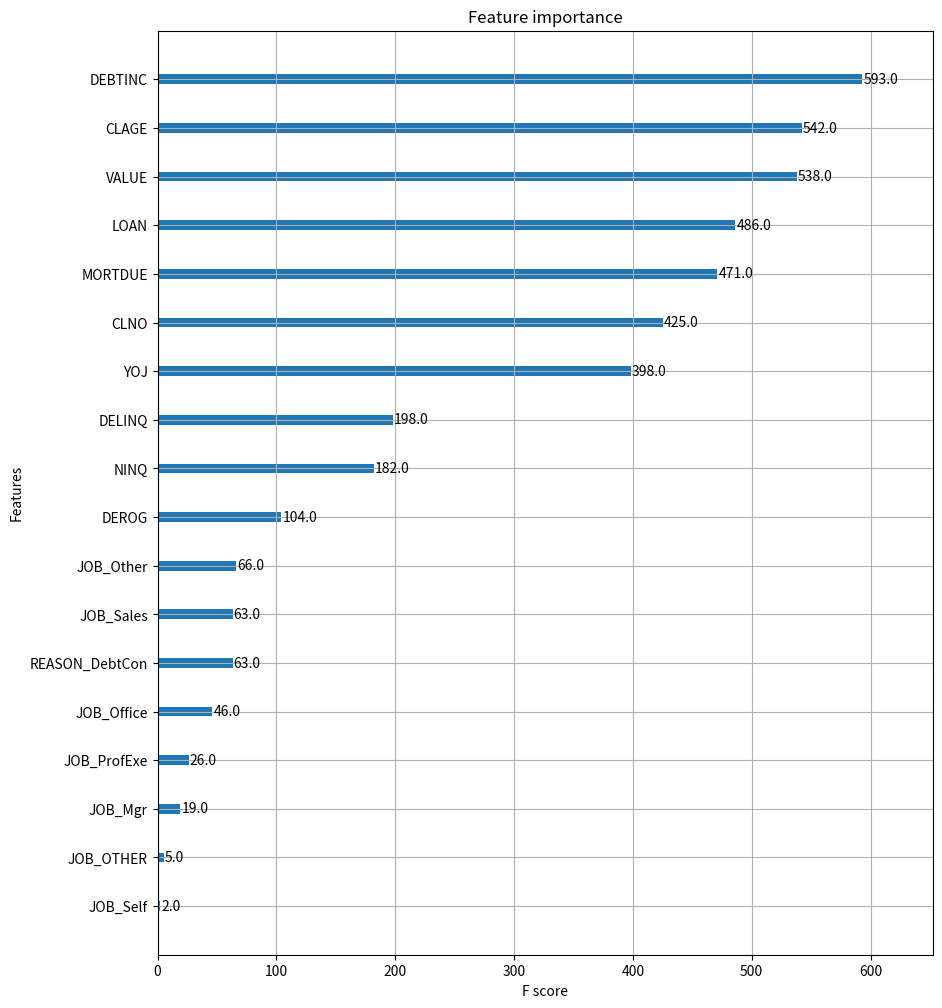

In [65]:
# 변수 중요도 확인 
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_stop, ax=ax)

# importance_type 변경 가능
# plot_importance(xgb_stop, importance_type='gain', ax=ax)

# @LightGBM 실습

In [75]:
# package 설치
!pip install lightgbm

In [28]:
# LightGBM 패키지 불러오기 
from lightgbm import LGBMClassifier

# 변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [26]:
# 기본 모델 지정 및 기본 옵션 확인
lgbm_uncust = LGBMClassifier(random_state=1234)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [27]:
# 모델 적합
lgbm_uncust.fit(df_train_x, df_train_y)
print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
lgbm_pred_train = lgbm_uncust.predict(df_train_x)
eval_class_model(df_train_y, lgbm_pred_train)
print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
lgbm_pred_test = lgbm_uncust.predict(df_test_x)
eval_class_model(df_test_y, lgbm_pred_test)

NameError: name 'df_train_x' is not defined

In [79]:
# 사용자 모델 생성
lgbm_user= LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
lgbm_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
lgbm_pred_train = lgbm_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

# 예측 및 모델 평가:Test  
lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 241, number of negative: 2382
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1413
[LightGBM] [Info] Number of data points in the train set: 2623, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.091880 -> initscore=-2.290899
[LightGBM] [Info] Start training from score -2.290899
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [24]:
# sklearn lightgbm 모델의 조기 중단 : fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss
eval_df = [(df_test_x, df_test_y)]

lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state=1234)
# lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6,
#                           reg_alpha=0.2)

# 모델 성능 평가 데이터
lgbm_stop.fit(df_train_x, df_train_y,
              # 조기 중단 파라미터
              early_stopping_rounds = 200, eval_metric="logloss", eval_set = eval_df, verbose=True)

NameError: name 'df_test_x' is not defined

In [ ]:
# 최적모델 정보 확인
print("최적 횟수:",lgbm_stop.best_iteration_)  
print("최적 성능(0-LogLoss):",lgbm_stop.best_score_)  

In [ ]:
# 최적 모델 평가
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))

In [ ]:
# 변수 중요도 확인 
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(lgbm_stop, ax=ax)

# @Categorical Boosting 실습

In [82]:
# package 설치
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.9 MB/s eta 0:00:00m eta 0:00:010:00:01


In [83]:
# 패키지 불러오기 
from catboost import CatBoostClassifier

# 변수 중요도 확인: CatBoost는 plot_importance 함수 미지원

# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [84]:
# 기본 모델 지정 및 기본 옵션 확인
cbc_uncust = CatBoostClassifier(random_state=1234)

cbc_uncust.get_all_params

<bound method CatBoost.get_all_params of <catboost.core.CatBoostClassifier object at 0x7fe4b8603af0>>

In [85]:
# 모델 적합
cbc_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y, cbc_pred_test)

Learning rate set to 0.015551
0:	learn: 0.6759020	total: 52.4ms	remaining: 52.4s
1:	learn: 0.6590954	total: 57.5ms	remaining: 28.7s
2:	learn: 0.6417346	total: 61.8ms	remaining: 20.5s
3:	learn: 0.6259035	total: 64.7ms	remaining: 16.1s
4:	learn: 0.6112358	total: 67.7ms	remaining: 13.5s
5:	learn: 0.5967933	total: 70.9ms	remaining: 11.7s
6:	learn: 0.5823979	total: 73.1ms	remaining: 10.4s
7:	learn: 0.5690662	total: 76.8ms	remaining: 9.52s
8:	learn: 0.5562452	total: 78.9ms	remaining: 8.69s
9:	learn: 0.5445557	total: 81.2ms	remaining: 8.04s
10:	learn: 0.5323888	total: 83.2ms	remaining: 7.48s
11:	learn: 0.5217795	total: 84.9ms	remaining: 6.99s
12:	learn: 0.5103972	total: 86.8ms	remaining: 6.59s
13:	learn: 0.5003415	total: 88.9ms	remaining: 6.26s
14:	learn: 0.4880711	total: 90.8ms	remaining: 5.96s
15:	learn: 0.4794751	total: 92.2ms	remaining: 5.67s
16:	learn: 0.4695229	total: 94.4ms	remaining: 5.46s
17:	learn: 0.4600413	total: 96.4ms	remaining: 5.26s
18:	learn: 0.4514595	total: 98.4ms	remaining

In [86]:
# 사용자 모델 생성
cbc_user= CatBoostClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 6, random_state=1234)
# 모델 적합
cbc_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가:Train  
cbc_pred_train = cbc_user.predict(df_train_x)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, cbc_pred_train)
print('\n',classification_report(df_train_y, cbc_pred_train))


# 예측 및 모델 평가:Test  
cbc_pred_test = cbc_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_test)
print('\n',classification_report(df_test_y, cbc_pred_test))

0:	learn: 0.5895880	total: 4.12ms	remaining: 819ms
1:	learn: 0.5091634	total: 7.19ms	remaining: 712ms
2:	learn: 0.4398551	total: 10.3ms	remaining: 678ms
3:	learn: 0.3932521	total: 13.5ms	remaining: 659ms
4:	learn: 0.3564111	total: 16.1ms	remaining: 628ms
5:	learn: 0.3279758	total: 18.5ms	remaining: 598ms
6:	learn: 0.3031656	total: 21ms	remaining: 579ms
7:	learn: 0.2859799	total: 23.3ms	remaining: 560ms
8:	learn: 0.2719461	total: 25.4ms	remaining: 540ms
9:	learn: 0.2596109	total: 28ms	remaining: 532ms
10:	learn: 0.2479861	total: 30.1ms	remaining: 518ms
11:	learn: 0.2373933	total: 32.3ms	remaining: 505ms
12:	learn: 0.2304581	total: 34.5ms	remaining: 496ms
13:	learn: 0.2233018	total: 36.4ms	remaining: 484ms
14:	learn: 0.2165182	total: 38.3ms	remaining: 472ms
15:	learn: 0.2111991	total: 40.2ms	remaining: 462ms
16:	learn: 0.2058462	total: 42.2ms	remaining: 454ms
17:	learn: 0.2011073	total: 44.4ms	remaining: 449ms
18:	learn: 0.1966342	total: 46.5ms	remaining: 443ms
19:	learn: 0.1922019	total

In [87]:
# CatBoost 모델의 조기 중단:fit( )에 파라미터 입력(early_stopping_rounds, eval_metrics, eval_set.)
# 모델 파라미터 지정:n_estimators, learning_rate, max_depth 등 지정
# 조기 중간 파라미터 지정: early_stopping_rounds 
# 평가지표 지정:logloss

# 모델 성능 평가 데이터
eval_df = [(df_test_x, df_test_y)]

cbc_stop = CatBoostClassifier(n_estimators = 300, learning_rate = 0.1 , max_depth = 6, random_state=1234)

cbc_stop.fit(df_train_x, df_train_y, 
            # 조기 중단 파라미터
             early_stopping_rounds = 150,eval_set = eval_df, verbose=True)
# cbc_stop.fit(df_train_x, df_train_y, 
#             # 조기 중단 파라미터
#              early_stopping_rounds = 150, eval_metric="auto", eval_set = eval_df, 
#              verbose=True)

0:	learn: 0.5895880	test: 0.5902351	best: 0.5902351 (0)	total: 4.28ms	remaining: 1.28s
1:	learn: 0.5091634	test: 0.5100842	best: 0.5100842 (1)	total: 7.93ms	remaining: 1.18s
2:	learn: 0.4398551	test: 0.4418896	best: 0.4418896 (2)	total: 11.4ms	remaining: 1.13s
3:	learn: 0.3932521	test: 0.3958245	best: 0.3958245 (3)	total: 14.7ms	remaining: 1.09s
4:	learn: 0.3564111	test: 0.3607410	best: 0.3607410 (4)	total: 18ms	remaining: 1.06s
5:	learn: 0.3279758	test: 0.3330988	best: 0.3330988 (5)	total: 21ms	remaining: 1.03s
6:	learn: 0.3031656	test: 0.3108044	best: 0.3108044 (6)	total: 23.7ms	remaining: 992ms
7:	learn: 0.2859799	test: 0.2944782	best: 0.2944782 (7)	total: 27.3ms	remaining: 995ms
8:	learn: 0.2719461	test: 0.2813353	best: 0.2813353 (8)	total: 29.5ms	remaining: 954ms
9:	learn: 0.2596109	test: 0.2715156	best: 0.2715156 (9)	total: 31.8ms	remaining: 923ms
10:	learn: 0.2479861	test: 0.2615659	best: 0.2615659 (10)	total: 34.1ms	remaining: 897ms
11:	learn: 0.2373933	test: 0.2529267	best: 0.

In [88]:
# 최적모델 정보 확인
print("최적 횟수:",cbc_stop.best_iteration_)  
print("최적 성능:",cbc_stop.best_score_)

최적 횟수: 146
최적 성능: {'learn': {'Logloss': 0.02070902601602369}, 'validation': {'Logloss': 0.17319528463292921}}


In [89]:
# 조기 중단 예측 및 모델 평가:Test  
cbc_pred_stop = cbc_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_stop)
print('\n',classification_report(df_test_y, cbc_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[1021    0]
 [  58   46]] 

정확도: 0.9484
정밀도: 1.0000
재현율: 0.4423
F1    : 0.6133
AUC   : 0.7212

               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1021
           1       1.00      0.44      0.61       104

    accuracy                           0.95      1125
   macro avg       0.97      0.72      0.79      1125
weighted avg       0.95      0.95      0.94      1125



In [90]:
# 변수 중요도 확인 
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)
# print(cbc_stop.get_feature_importance())

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'REASON_DebtCon', 'REASON_HomeImp', 'JOB_Mgr', 'JOB_OTHER', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe', 'JOB_Sales', 'JOB_Self']
[ 7.79626222  6.71452248 10.94129565  9.04995146  3.39982106  7.33736541
 12.74832299  6.56386565 10.05770011 14.1016896   1.98517218  0.95257086
  1.54087824  0.22338934  2.38539442  2.41853656  0.68400127  0.93324119
  0.16601932]


In [91]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_cbc_importance = pd.DataFrame()
df_cbc_importance ["Feature"] = cbc_stop.feature_names_
df_cbc_importance ["Importance"] = cbc_stop.feature_importances_
# 중요도별로 정렬
df_cbc_importance .sort_values("Importance", ascending=False, inplace = True)
df_cbc_importance .round(3)

,Feature,Importance
9,DEBTINC,14.102
6,CLAGE,12.748
2,VALUE,10.941
8,CLNO,10.058
3,YOJ,9.050
0,LOAN,7.796
5,DELINQ,7.337
1,MORTDUE,6.715
7,NINQ,6.564
4,DEROG,3.400


Text(0, 0.5, '설명변수')

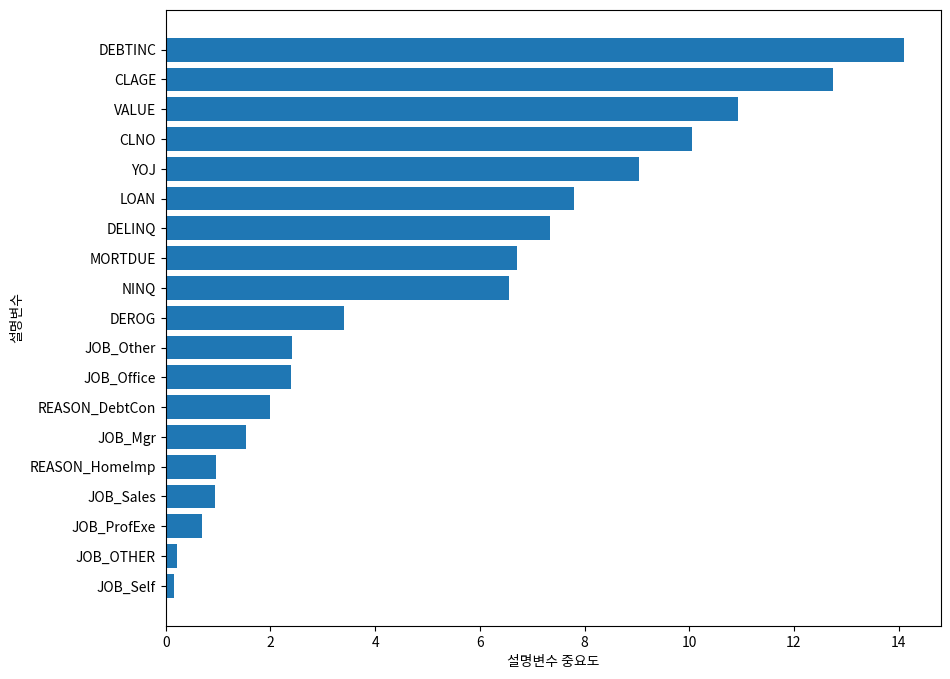

In [92]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
fig, ax = plt.subplots(figsize=(10, 8))

df_cbc_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_cbc_importance ))
plt.barh(y = coordinates, width = df_cbc_importance ["Importance"])
plt.yticks(coordinates, df_cbc_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# 서포트 벡터 머신_연습

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [66]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [67]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [95]:
df_raw["JOB"].fillna("Other", inplace=True)

In [69]:
df_raw.fillna(df_raw.mean(), inplace=True)

In [70]:
df_raw_x=df_raw.drop("BAD", axis=1, inplace=False)

In [71]:
df_raw_y=df_raw["BAD"]

In [72]:
display("설명변수:",df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'목표변수:'

0    1
1    1
2    0
3    1
4    0
Name: BAD, dtype: int64

In [73]:
df_raw_x_char= df_raw_x.select_dtypes(include="object")

In [74]:
df_x_dummy=pd.get_dummies(df_raw_x_char)

In [75]:
df_x_dummy.head()

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_OTHER,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0


In [76]:
display("Dummy 변환 전:",df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Office
3,HomeImp,Mgr
4,HomeImp,Office


'Dummy 변환 후:'

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_OTHER,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0


In [77]:
df_raw_x_num=df_raw_x.select_dtypes(exclude="object")

In [78]:
v_feature_names=df_raw_x_num.columns

In [79]:
scaler=StandardScaler()

In [80]:
df_x_scaled=scaler.fit_transform(df_raw_x_num)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)

In [81]:
display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:", df_x_scaled.head())


'Scale 변환 전:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456


In [82]:
df_x_converted= df_x_scaled.join(df_x_dummy)
display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:", df_x_converted.head())

'변환 전:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale/Dummy 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_OTHER,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,0,1,0,0,0,1,0,0,0
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,0,1,0,0,0,1,0,0,0
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,0,1,0,0,1,0,0,0,0
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,0,1,1,0,0,0,0,0,0
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,0,1,0,0,1,0,0,0,0


In [83]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y,test_size=0.3, random_state=1234)
print("분할 전 Train Data:{}".format(df_train_x.shape))
print("분할 후 Test Data:{}".format(df_test_x.shape))

분할 전 Train Data:(2623, 19)
분할 후 Test Data:(1125, 19)


In [84]:
svm_uncustomized= SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set: 0.945
Accuracy on test set: 0.937


In [85]:
print(svm_uncustomized.get_params().keys())
print(svm_uncustomized.get_params().values())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
dict_values([1.0, False, 200, None, 0.0, 'ovr', 3, 'scale', 'rbf', -1, False, 1234, True, 0.001, False])


In [86]:
train_accuracy=[]; test_accuracy=[]
para_c=[10**c for c in range(-2,3)]

for v_C in para_c :
    svm= SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

In [87]:
df_accuracy_c= pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainScore"]= train_accuracy
df_accuracy_c["TestScore"]=test_accuracy
df_accuracy_c.round(3)


,C,TrainScore,TestScore
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.945,0.937
3,10.00,0.981,0.953
4,100.00,0.997,0.956


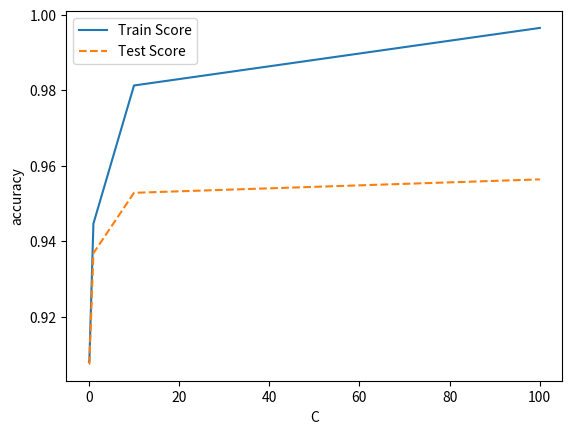

In [88]:
plt.plot(para_c, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_c, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("C"); plt.ylabel("accuracy")
plt.legend()

In [89]:
train_accuracy=[]; test_accuracy=[]
para_gamma=[10**gamma for gamma in range(-2,3)]

for v_gamma in para_gamma:
    svm= SVC(gamma=v_gamma,random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

In [90]:
df_accuracy_gamma= pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainScore"]= train_accuracy
df_accuracy_gamma["TestScore"]=test_accuracy
df_accuracy_gamma.round(3)


,gamma,TrainScore,TestScore
0,0.01,0.923,0.920
1,0.10,0.949,0.938
2,1.00,0.997,0.921
3,10.00,1.000,0.908
4,100.00,1.000,0.908


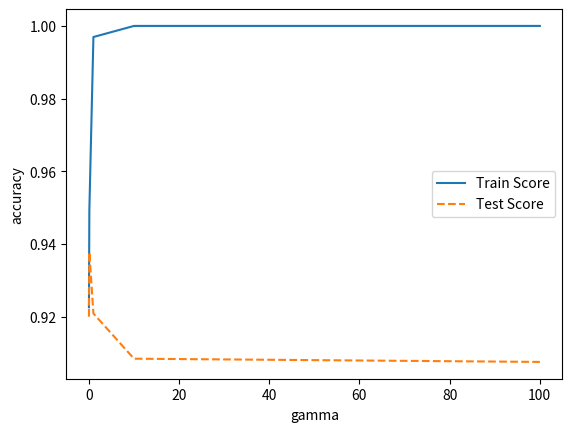

In [91]:
plt.plot(para_gamma, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_gamma, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("gamma"); plt.ylabel("accuracy")
plt.legend()

In [92]:
svc_final= SVC(gamma=0.2,C=0.8,random_state=1234)
svc_final.fit(df_train_x,df_train_y)
y_pred=svc_final.predict(df_test_x)


In [93]:
print("Train Accurary: {:.3f}".format(svc_final.score(df_train_x,df_train_y)))
print("Test Accuracy: {:.3f}".format(svc_final.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 0.964
Test Accuracy: 0.940
Test Confusion Matrix:
[[1021    0]
 [  68   36]]
              precision    recall  f1-score   support

           0      0.938     1.000     0.968      1021
           1      1.000     0.346     0.514       104

    accuracy                          0.940      1125
   macro avg      0.969     0.673     0.741      1125
weighted avg      0.943     0.940     0.926      1125



In [94]:
estimator=SVC(random_state=1234)
param_grid={"C":para_c,"gamma":para_gamma}

grid_svc=GridSearchCV(estimator,param_grid,scoring="accuracy", n_jobs= -1)
grid_svc.fit(df_train_x,df_train_y)

print("best estimator model: \n{}".format(grid_svc.best_estimator_))
print("\nbest parameter:\n{}".format(grid_svc.best_params_))
print("\nbest score:\n{}".format(grid_svc.best_score_.round(3)))

best estimator model: 
SVC(C=100, gamma=0.1, random_state=1234)

best parameter:
{'C': 100, 'gamma': 0.1}

best score:
0.96


# 인공 신경망 

In [114]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [96]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [97]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [98]:
df_raw["JOB"].fillna("Other", inplace=True)

In [99]:
df_raw.fillna(df_raw.mean(), inplace=True)

In [100]:
df_raw_x=df_raw.drop("BAD", axis=1, inplace=False)

In [101]:
df_raw_y=df_raw["BAD"]

In [102]:
display("설명변수:",df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'목표변수:'

0    1
1    1
2    0
3    1
4    0
Name: BAD, dtype: int64

In [103]:
df_raw_x_num=df_raw_x.select_dtypes(exclude="object")

In [104]:
v_feature_names=df_raw_x_num.columns

In [105]:
scaler=StandardScaler()

In [106]:
df_x_scaled=scaler.fit_transform(df_raw_x_num)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)

In [107]:
display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:", df_x_scaled.head())


'Scale 변환 전:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456


In [108]:
df_raw_x_char= df_raw_x.select_dtypes(include="object")

In [109]:
df_x_dummy=pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0


In [110]:
display("Dummy 변환 전:",df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Office
3,HomeImp,Mgr
4,HomeImp,Office


'Dummy 변환 후:'

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0


In [111]:
df_x_converted= df_x_scaled.join(df_x_dummy)
display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:", df_x_converted.head())

'변환 전:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale/Dummy 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,0,1,0,0,1,0,0,0
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,0,1,0,0,1,0,0,0
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,0,1,0,1,0,0,0,0
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,0,1,1,0,0,0,0,0
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,0,1,0,1,0,0,0,0


In [112]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y,test_size=0.3, random_state=1234)
print("분할 전 Train Data:{}".format(df_train_x.shape))
print("분할 후 Test Data:{}".format(df_test_x.shape))

분할 전 Train Data:(2623, 18)
분할 후 Test Data:(1125, 18)


In [115]:
nn_uncust=MLPClassifier(random_state=1234)

In [116]:
nn_uncust.fit(df_train_x,df_train_y)

MLPClassifier(random_state=1234)

In [117]:
print("Accurary on training: {:.3f}".format(nn_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_uncust.score(df_test_x,df_test_y)))

Accurary on training: 0.971
Accuracy on test set: 0.940


In [118]:
print(nn_uncust.get_params().keys())
print(nn_uncust.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


In [122]:
train_accuracy=[]; test_accuracy=[]
para_hidden=[5*hidden for hidden in range(1,21)]

print(para_hidden)
for v_hidden in para_hidden:
    nn= MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [123]:
df_accuracy_hidden= pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainScore"]= train_accuracy
df_accuracy_hidden["TestScore"]=test_accuracy
df_accuracy_hidden.round(3)


,HiddenLayer,TrainScore,TestScore
0,5,0.930,0.928
1,10,0.940,0.931
2,15,0.968,0.943
3,20,0.973,0.948
4,25,0.981,0.941
5,30,0.986,0.946
6,35,0.989,0.951
7,40,0.995,0.952
8,45,0.995,0.948
9,50,0.998,0.956


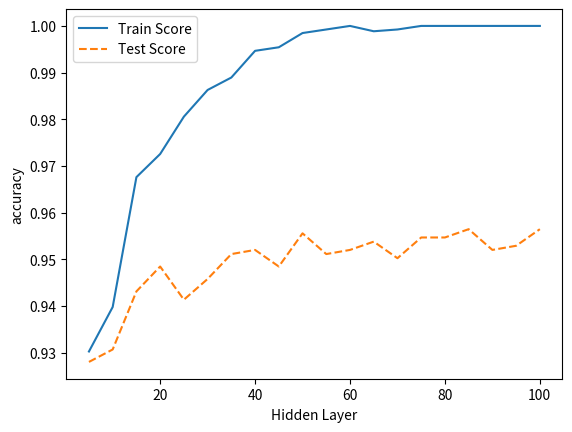

In [124]:
plt.plot(para_hidden, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Hidden Layer"); plt.ylabel("accuracy")
plt.legend()

In [126]:
train_accuracy=[]; test_accuracy=[]
para_function=["logistic","tanh","relu"]

for v_function in para_function:
    nn= MLPClassifier(activation=v_function,hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

In [127]:
df_accuracy_function= pd.DataFrame()
df_accuracy_function["ActivationFunction"]=para_function
df_accuracy_function["TrainScore"]= train_accuracy
df_accuracy_function["TestScore"]=test_accuracy
df_accuracy_function.round(3)


,ActivationFunction,TrainScore,TestScore
0,logistic,0.932,0.926
1,tanh,0.998,0.951
2,relu,1.000,0.955


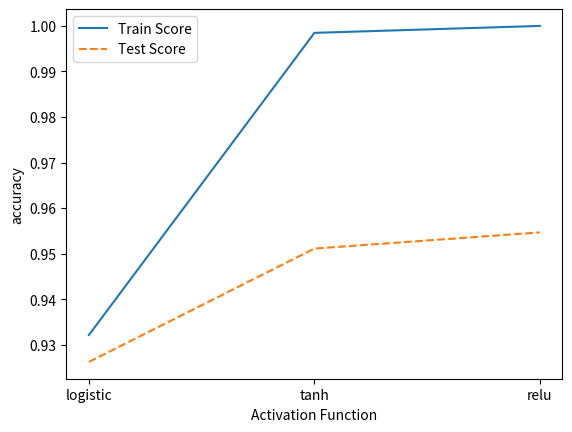

In [128]:
plt.plot(para_function, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Activation Function"); plt.ylabel("accuracy")
plt.legend()

In [129]:
train_accuracy=[]; test_accuracy=[]
para_solver=["lbfgs","sgd","adam"]

for v_solver in para_solver:
    nn= MLPClassifier(solver=v_solver,activation="relu",hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

In [130]:
df_accuracy_solver= pd.DataFrame()
df_accuracy_solver["Solver"]=para_solver
df_accuracy_solver["TrainScore"]= train_accuracy
df_accuracy_solver["TestScore"]=test_accuracy
df_accuracy_solver.round(3)


,Solver,TrainScore,TestScore
0,lbfgs,1.000,0.947
1,sgd,0.932,0.930
2,adam,1.000,0.955


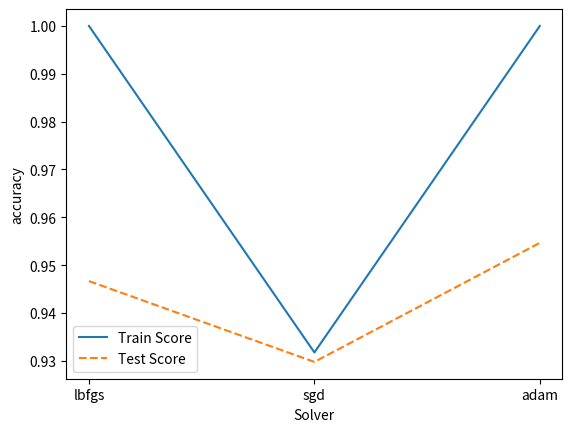

In [132]:
plt.plot(para_solver, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_solver, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Solver"); plt.ylabel("accuracy")
plt.legend()

In [136]:
train_accuracy=[]; test_accuracy=[]
para_batch=[20*batch for batch in range(1,10)]

print(para_batch)
for v_batch in para_batch:
    nn= MLPClassifier(batch_size=v_batch,solver="adam",activation="relu",hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))

[20, 40, 60, 80, 100, 120, 140, 160, 180]


In [139]:
df_accuracy_batch= pd.DataFrame()
df_accuracy_batch["Mini batch"]=para_hidden
df_accuracy_batch["TrainScore"]= train_accuracy
df_accuracy_batch["TestScore"]=test_accuracy
df_accuracy_batch.round(3)


,Mini batch,TrainScore,TestScore
0,20,1.0,0.957
1,40,1.0,0.952
2,60,1.0,0.955
3,80,1.0,0.951
4,100,1.0,0.949
5,120,1.0,0.953
6,140,1.0,0.953
7,160,1.0,0.950
8,180,1.0,0.953


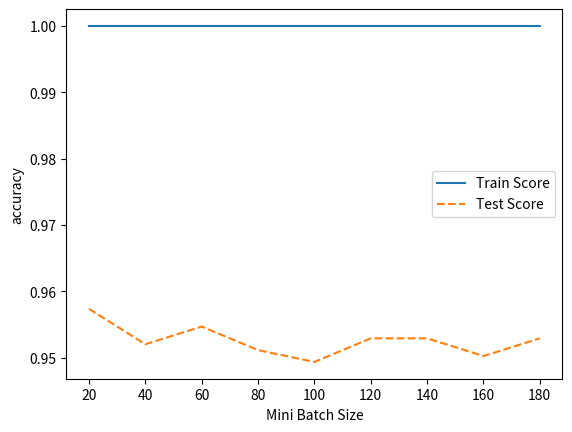

In [140]:
plt.plot(para_batch, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("Mini Batch Size"); plt.ylabel("accuracy")
plt.legend()

In [141]:
nn_final= MLPClassifier(hidden_layer_sizes=(80,80),activation="relu",solver="adam",random_state=1234)
nn_final.fit(df_train_x,df_train_y)
y_pred=nn_final.predict(df_test_x)


In [142]:
print("Train Accurary: {:.3f}".format(nn_final.score(df_train_x,df_train_y)))
print("Test Accuracy: {:.3f}".format(nn_final.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 1.000
Test Accuracy: 0.955
Test Confusion Matrix:
[[1018    3]
 [  48   56]]
              precision    recall  f1-score   support

           0      0.955     0.997     0.976      1021
           1      0.949     0.538     0.687       104

    accuracy                          0.955      1125
   macro avg      0.952     0.768     0.831      1125
weighted avg      0.954     0.955     0.949      1125



# KNN

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family= 'Noto Sans CJK JP')
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/HMEQ.csv", encoding='euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [ ]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [ ]:
df_raw["JOB"].fillna("Other", inplace=True)

In [ ]:
df_raw.fillna(df_raw.mean(), inplace=True)

In [6]:
df_raw_x=df_raw.drop("BAD", axis=1, inplace=False)

In [7]:
df_raw_y=df_raw["BAD"]

In [8]:
display("설명변수:",df_raw_x.head())
display("목표변수:",df_raw_y.head())

'설명변수:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'목표변수:'

0    1
1    1
2    0
3    1
4    0
Name: BAD, dtype: int64

In [9]:
df_raw_x_num=df_raw_x.select_dtypes(exclude="object")

In [10]:
v_feature_names=df_raw_x_num.columns

In [11]:
scaler=StandardScaler()

In [12]:
df_x_scaled=scaler.fit_transform(df_raw_x_num)
df_x_scaled=pd.DataFrame(df_x_scaled, columns=v_feature_names)

In [13]:
display("Scale 변환 전:", df_raw_x_num.head())
display("Scale 변환 후:", df_x_scaled.head())


'Scale 변환 전:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456


In [14]:
df_raw_x_char= df_raw_x.select_dtypes(include="object")

In [15]:
df_x_dummy=pd.get_dummies(df_raw_x_char)
df_x_dummy.head()

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0


In [16]:
display("Dummy 변환 전:",df_raw_x_char.head())
display("Dummy 변환 후:",df_x_dummy.head())

'Dummy 변환 전:'

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Office
3,HomeImp,Mgr
4,HomeImp,Office


'Dummy 변환 후:'

,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,0,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0
3,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,0


In [17]:
df_x_converted= df_x_scaled.join(df_x_dummy)
display("변환 전:", df_raw_x.head())
display("Scale/Dummy 변환 후:", df_x_converted.head())

'변환 전:'

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


'Scale/Dummy 변환 후:'

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,0,1,0,0,1,0,0,0
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,0,1,0,0,1,0,0,0
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,0,1,0,1,0,0,0,0
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,0,1,1,0,0,0,0,0
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,0,1,0,1,0,0,0,0


In [18]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_converted, df_raw_y,test_size=0.3, random_state=1234)
print("분할 전 Train Data:{}".format(df_train_x.shape))
print("분할 후 Test Data:{}".format(df_test_x.shape))

분할 전 Train Data:(2623, 18)
분할 후 Test Data:(1125, 18)


In [19]:
knn_uncust=KNeighborsClassifier()

In [20]:
knn_uncust.fit(df_train_x,df_train_y)

KNeighborsClassifier()

In [21]:
print("Accurary on training: {:.3f}".format(knn_uncust.score(df_train_x,df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncust.score(df_test_x,df_test_y)))

Accurary on training: 0.945
Accuracy on test set: 0.928


In [22]:
print(knn_uncust.get_params().keys())
print(knn_uncust.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


In [23]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [24]:
df_accuracy_neighbors= pd.DataFrame()
df_accuracy_neighbors["Neighbors"]=para_n_neighbors
df_accuracy_neighbors["TrainScore"]= train_accuracy
df_accuracy_neighbors["TestScore"]=test_accuracy
df_accuracy_neighbors.round(3)


,Neighbors,TrainScore,TestScore
0,1,1.000,0.948
1,2,0.961,0.930
2,3,0.967,0.933
3,4,0.943,0.926
4,5,0.945,0.928
5,6,0.931,0.921
6,7,0.934,0.921
7,8,0.928,0.918
8,9,0.928,0.917
9,10,0.923,0.917


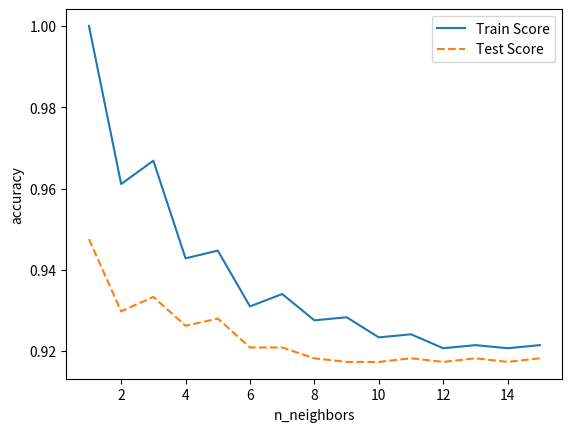

In [25]:
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Score")
plt.plot(para_n_neighbors, test_accuracy, linestyle="--", label="Test Score")
plt.xlabel("n_neighbors"); plt.ylabel("accuracy")
plt.legend()

In [26]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,11)]*2
para_weights=(["uniform"])*10+(["distance"]*10)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, weights= v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [30]:
df_accuracy_weights= pd.DataFrame()
df_accuracy_weights["Neighbors"]=para_n_neighbors
df_accuracy_weights["Weights"]=para_weights
df_accuracy_weights["TrainAccuracy"]= train_accuracy
df_accuracy_weights["TestAccuracy"]=test_accuracy
df_accuracy_weights.round(3)


,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.948
1,2,uniform,0.961,0.930
2,3,uniform,0.967,0.933
3,4,uniform,0.943,0.926
4,5,uniform,0.945,0.928
5,6,uniform,0.931,0.921
6,7,uniform,0.934,0.921
7,8,uniform,0.928,0.918
8,9,uniform,0.928,0.917
9,10,uniform,0.923,0.917


In [31]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors", columns="Weights", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.947556  0.947556
2                   1.0  0.961113     0.947556  0.929778
3                   1.0  0.966832     0.941333  0.933333
4                   1.0  0.942814     0.940444  0.926222
5                   1.0  0.944720     0.937778  0.928000
6                   1.0  0.930995     0.937778  0.920889
7                   1.0  0.934045     0.928000  0.920889
8                   1.0  0.927564     0.929778  0.918222
9                   1.0  0.928326     0.925333  0.917333
10                  1.0  0.923370     0.928889  0.917333

In [32]:
level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)

df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.947556,0.947556
2,1.0,0.961113,0.947556,0.929778
3,1.0,0.966832,0.941333,0.933333
4,1.0,0.942814,0.940444,0.926222
5,1.0,0.944720,0.937778,0.928000


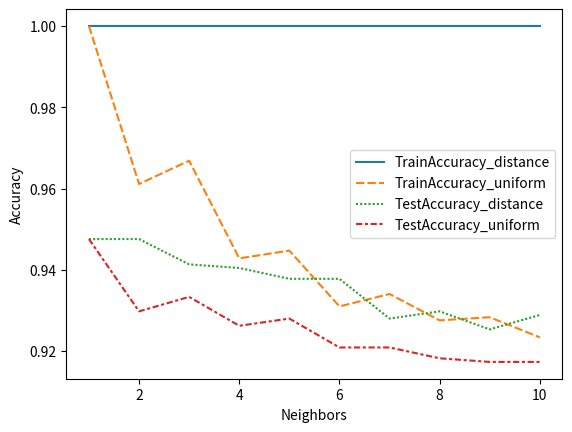

In [35]:
sns.lineplot(data=df_accuracy_weights_pivot)
plt.ylabel("Accuracy");

In [36]:
train_accuracy=[]; test_accuracy=[]
para_n_neighbors=[i for i in range(1,11)]*2
para_metric=["euclidean"]*10+["manhattan"]*10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn= KNeighborsClassifier(n_neighbors=v_n_neighbors, metric=v_metric, weights="uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

In [39]:
df_accuracy_metric= pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]= train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy
df_accuracy_metric.round(3)


,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.948
1,2,euclidean,0.961,0.930
2,3,euclidean,0.967,0.933
3,4,euclidean,0.943,0.926
4,5,euclidean,0.945,0.928
5,6,euclidean,0.931,0.921
6,7,euclidean,0.934,0.921
7,8,euclidean,0.928,0.918
8,9,euclidean,0.928,0.917
9,10,euclidean,0.923,0.917


In [42]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index="Neighbors", columns="Metric", values=["TrainAccuracy","TestAccuracy"])
df_accuracy_metric_pivot

TrainAccuracy           TestAccuracy          
Metric        euclidean manhattan    euclidean manhattan
Neighbors                                               
1              1.000000  1.000000     0.947556  0.944889
2              0.961113  0.955013     0.929778  0.925333
3              0.966832  0.960351     0.933333  0.929778
4              0.942814  0.934045     0.926222  0.920000
5              0.944720  0.938239     0.928000  0.922667
6              0.930995  0.924514     0.920889  0.916444
7              0.934045  0.928708     0.920889  0.917333
8              0.927564  0.919177     0.918222  0.914667
9              0.928326  0.921083     0.917333  0.915556
10             0.923370  0.915745     0.917333  0.912000

In [43]:
level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)

df_accuracy_metric_pivot.columns=level0+"_"+level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TestAccuracy_euclidean,TestAccuracy_manhattan
Neighbors,,,,
1,1.000000,1.000000,0.947556,0.944889
2,0.961113,0.955013,0.929778,0.925333
3,0.966832,0.960351,0.933333,0.929778
4,0.942814,0.934045,0.926222,0.920000
5,0.944720,0.938239,0.928000,0.922667


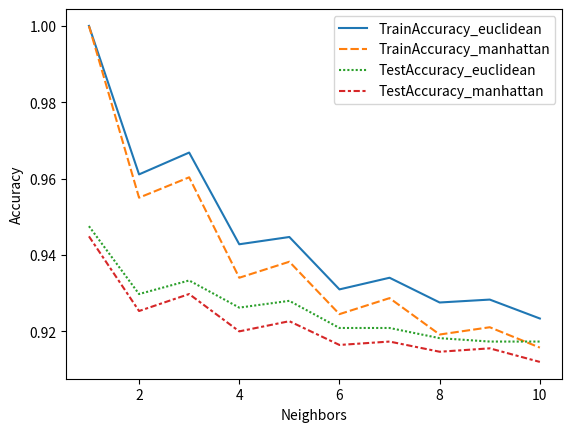

In [44]:
sns.lineplot(data=df_accuracy_metric_pivot)
plt.ylabel("Accuracy");

In [47]:
knn_model= KNeighborsClassifier(n_neighbors=4, weights="uniform", metric="euclidean")
knn_model.fit(df_train_x,df_train_y)
y_pred=knn_model.predict(df_test_x)


In [ ]:
print("Train Accurary: {:.3f}".format(knn_model.score(df_train_x,df_train_y)))
print("Test Accuracy: {:.3f}".format(knn_model.score(df_test_x,df_test_y)))
print("Test Confusion Matrix:\n{}".format(confusion_matrix(df_test_y , y_pred)))
print(classification_report(df_test_y, y_pred, digits=3))

Train Accurary: 0.943
Test Accuracy: 0.926
Test Confusion Matrix:
[[1021    0]
 [  83   21]]
              precision    recall  f1-score   support

           0      0.925     1.000     0.961      1021
           1      1.000     0.202     0.336       104

    accuracy                          0.926      1125
   macro avg      0.962     0.601     0.648      1125
weighted avg      0.932     0.926     0.903      1125

